# HW_4 Decision Trees- Geetanjali Kulkarni and Paulo Grab

## Importing necessary libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

## Importing data

In [76]:
# importing data
df = pd.read_csv('Loans_Dataset.csv')

In [77]:
# Display the first 5 rows of data
df.head()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [78]:
# Display the last 5 rows of data
df.tail()

,initial_payment,last_payment,credit_score,house_number,sum,result
999,168,14798,834,4937,20737,No
1000,234,14567,756,4766,20678,yes
1001,450,13897,867,7896,210456,yes
1002,347,14999,687,9876,246789,yes
1003,467,13555,666,7899,21786,yes


## Data exploration

In [79]:
# Describing the data
df.describe()

,initial_payment,last_payment,credit_score,house_number,sum
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,294.662351,12473.009960,528.902390,4041.282869,17744.012948
std,115.844218,1442.134231,259.681745,618.431417,9594.659715
min,100.000000,10005.000000,100.000000,3003.000000,13515.000000
25%,195.750000,11213.500000,302.750000,3546.500000,16081.250000
50%,290.000000,12467.000000,518.000000,4046.000000,17383.000000
75%,398.000000,13690.000000,755.000000,4508.750000,18608.250000
max,500.000000,14999.000000,997.000000,9876.000000,246789.000000


In [80]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1004 non-null   int64 
 1   last_payment     1004 non-null   int64 
 2   credit_score     1004 non-null   int64 
 3   house_number     1004 non-null   int64 
 4   sum              1004 non-null   int64 
 5   result           1004 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.2+ KB


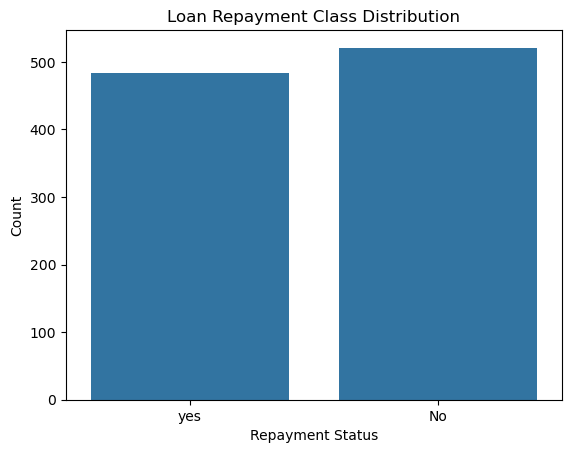

In [81]:
# Countplot
sns.countplot(x='result', data=df)
plt.title('Loan Repayment Class Distribution')
plt.xlabel('Repayment Status')
plt.ylabel('Count')
plt.show()


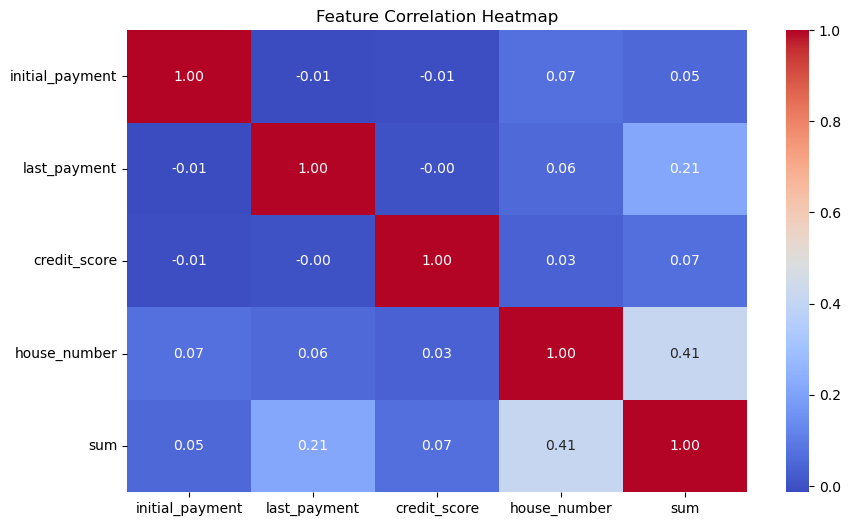

In [82]:
# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


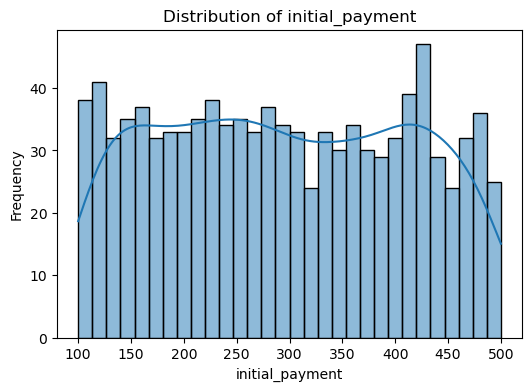

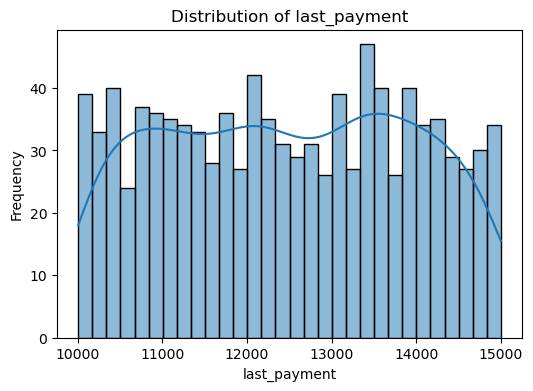

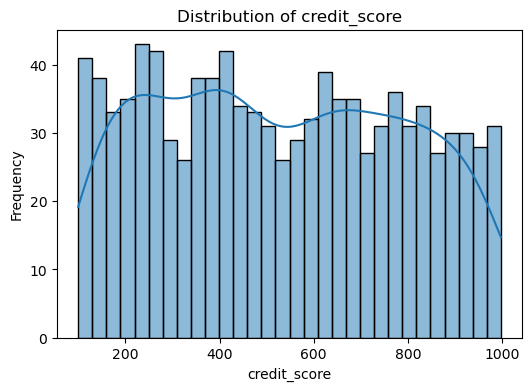

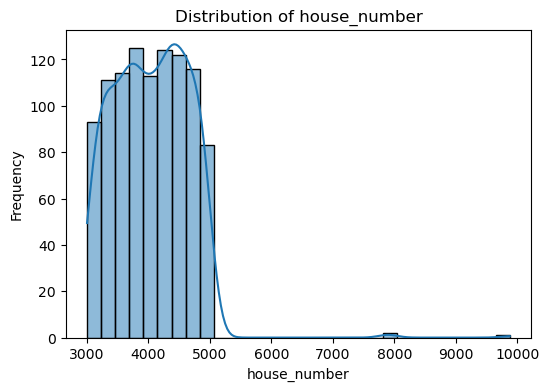

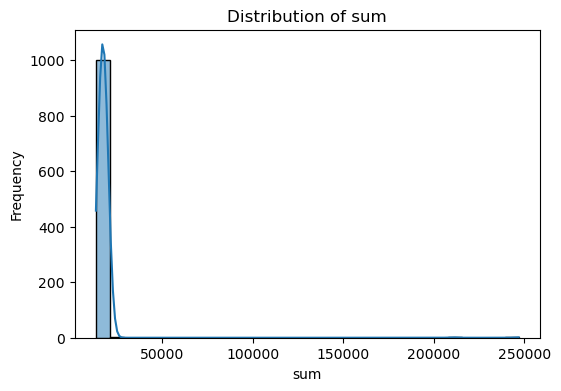

In [83]:
# Distribution plot
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## Data Preprocessing

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1004 non-null   int64 
 1   last_payment     1004 non-null   int64 
 2   credit_score     1004 non-null   int64 
 3   sum              1004 non-null   int64 
 4   result           1004 non-null   object
dtypes: int64(4), object(1)
memory usage: 39.3+ KB


In [87]:
df.describe()

,initial_payment,last_payment,credit_score,sum
count,1004.000000,1004.000000,1004.000000,1004.000000
mean,294.662351,12473.009960,528.902390,17744.012948
std,115.844218,1442.134231,259.681745,9594.659715
min,100.000000,10005.000000,100.000000,13515.000000
25%,195.750000,11213.500000,302.750000,16081.250000
50%,290.000000,12467.000000,518.000000,17383.000000
75%,398.000000,13690.000000,755.000000,18608.250000
max,500.000000,14999.000000,997.000000,246789.000000


In [85]:
# Dropping the unwanted columns like house number
df.drop("house_number", axis=1, inplace=True)
df.head()

,initial_payment,last_payment,credit_score,sum,result
0,201,10018,250,13515,yes
1,205,10016,395,13660,yes
2,257,10129,109,13746,yes
3,246,10064,324,13771,yes
4,117,10115,496,13822,yes


In [89]:
# Printing the null/missing values
print(df.isnull().sum())

initial_payment    0
last_payment       0
credit_score       0
sum                0
result             0
dtype: int64


In [95]:
# Select features to normalize (excluding 'result' column)
X = df.drop('result', axis=1)
y = df['result']  # Target

In [96]:
# Using standard scaler for normalising the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## Modeling

In [97]:
# defining the feature and target columns
X = df.drop('result', axis=1)  # Features
y = df['result']               # Target

In [98]:
# Spilliting the data in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Initialization and decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [101]:
# Making predpredictions
y_pred = model.predict(X_test)

## Predict result

In [103]:
# Prediction
print(y_pred)

['No' 'No' 'No' 'No' 'yes' 'No' 'No' 'No' 'yes' 'yes' 'No' 'yes' 'No'
 'yes' 'yes' 'No' 'No' 'No' 'yes' 'yes' 'No' 'No' 'yes' 'yes' 'No' 'yes'
 'yes' 'yes' 'yes' 'No' 'No' 'No' 'yes' 'yes' 'No' 'yes' 'No' 'yes' 'yes'
 'yes' 'No' 'No' 'yes' 'No' 'yes' 'yes' 'yes' 'No' 'No' 'No' 'No' 'No'
 'yes' 'No' 'No' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'yes' 'yes' 'No' 'No'
 'No' 'yes' 'yes' 'No' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'No'
 'yes' 'No' 'No' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'No' 'yes' 'No' 'No'
 'No' 'No' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'No'
 'No' 'yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'yes' 'yes' 'No' 'No'
 'yes' 'No' 'yes' 'No' 'yes' 'No' 'yes' 'No' 'yes' 'No' 'yes' 'yes' 'No'
 'No' 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'No' 'yes' 'yes' 'yes' 'yes' 'yes'
 'No' 'No' 'No' 'yes' 'No' 'yes' 'yes' 'No' 'No' 'yes' 'No' 'No' 'No' 'No'
 'yes' 'yes' 'yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'yes' 'yes'
 'No' 'No' 'yes' 'yes' 'yes' 'No' 'No' 'yes' 'yes' 'N

## Evaluation 

In [107]:
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9950248756218906


Confusion Matrix:
 [[106   1]
 [  0  94]]


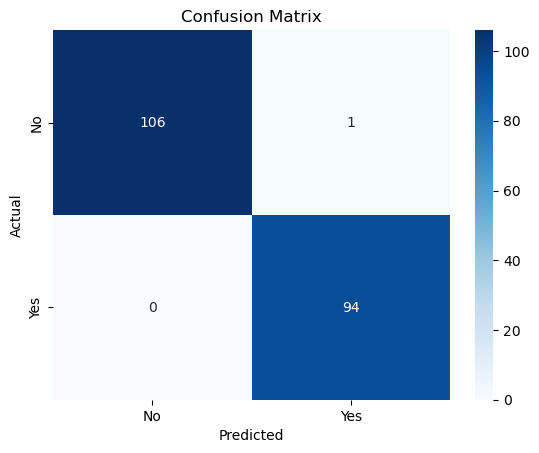

In [109]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualising the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [111]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

          No       1.00      0.99      1.00       107
         yes       0.99      1.00      0.99        94

    accuracy                           1.00       201
   macro avg       0.99      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



In [112]:
# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (weighted):", f1)

F1 Score (weighted): 0.9950263586308713
